In [1]:
from __future__ import (division, print_function)
import numpy as np
from alea.math_utils.tensor.libxerus.reconstruction_util import reconstruct_project
from alea.math_utils.param_pde.affine_field import AffineField, AffineFieldCache
from alea.math_utils.param_pde.mesh_util import get_mesh, get_boundary
from dolfin import *
import matplotlib.pyplot as plt
from alea.utils.progress.bar import Bar

%matplotlib notebook

Our aim is to reconstruct an affine function using a fixed Legendre basis.
Therefore, we create the functional representation of an affine field and sample only in the region $[-1, 1]^M$.

In [2]:
coef_options = {
    "coef_type": "monomials",
    "amptype": "constant",
    "decayexp": 0.1,
    "gamma": 0.9,
    "freqscale": 1.0,
    "freqskip": 0,
    "rv_type": "uniform",
    "scale": 1.0,
    "coef_mean": 0.0
}
coef = AffineField(**coef_options)

refined from 54 to 216 cells


<IPython.core.display.Javascript object>


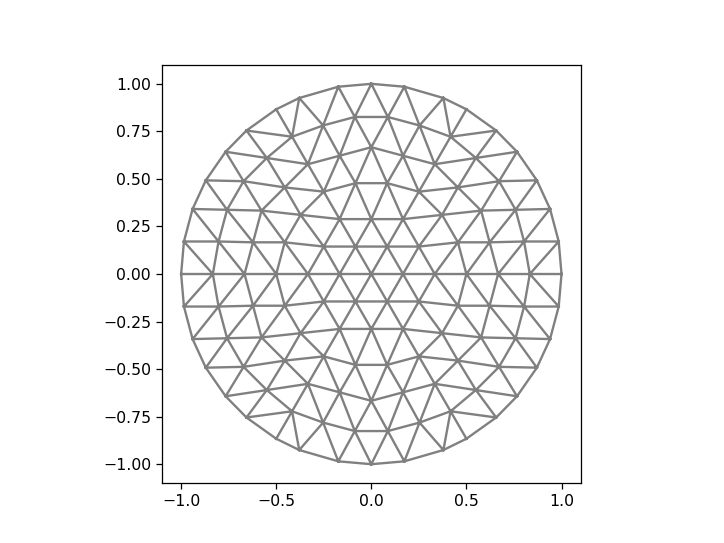

In [3]:
mesh = get_mesh("circle", mesh_nodes=5e1)
boundary = get_boundary("dirichlet")
fs = FunctionSpace(mesh, 'CG', 2)
plt.figure()
plot(mesh)
plt.show()

In [4]:
cache = AffineFieldCache(fs)
def fun(y, fs, project=True):
    M = len(y)
    retval = coef(y, fs, project_result=project, cache=cache)
    return retval

<IPython.core.display.Javascript object>


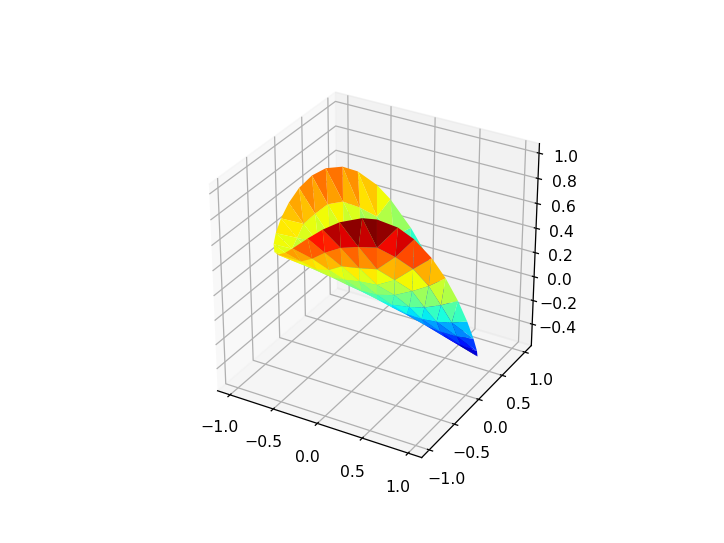

In [5]:
M = 5
y = np.random.rand(M)*2 - 1


a = fun(y, fs)

fig = plt.figure()
im = plot(a, mode="warp")
plt.show()


In [6]:
n_samples = 200
samples = []
measurements = np.zeros((fs.dim(), n_samples))
for lia in range(n_samples):
    y = np.random.rand(M)*2 - 1
    samples.append(y)
    measurements[:, lia] = fun(y, fs, project=False)

In [7]:
recon_dict = {
    "new_fs": None,
    "adf_tol": 1e-8,
    "adf_iter": 1000,
    "_poly_dim": 10,
    "use_rb": True,
    "ew_tol": 1e-16
}

tensor = reconstruct_project(measurements, samples, fs, **recon_dict)
print(tensor)

Samples have the same length as the function space dimension. Are they aligned? -> no projection
err: 0.0, 200 samples rounded from fs-dim 469 to 200
Extended Tensor Train: 
 dimension: [469, 10, 10, 10, 10, 10] 
 ranks: [1, 5, 5, 4, 3, 2, 1] 
 basis: [<BasisType.points: 1>, <BasisType.Legendre: 2>, <BasisType.Legendre: 2>, <BasisType.Legendre: 2>, <BasisType.Legendre: 2>, <BasisType.Legendre: 2>]


<IPython.core.display.Javascript object>


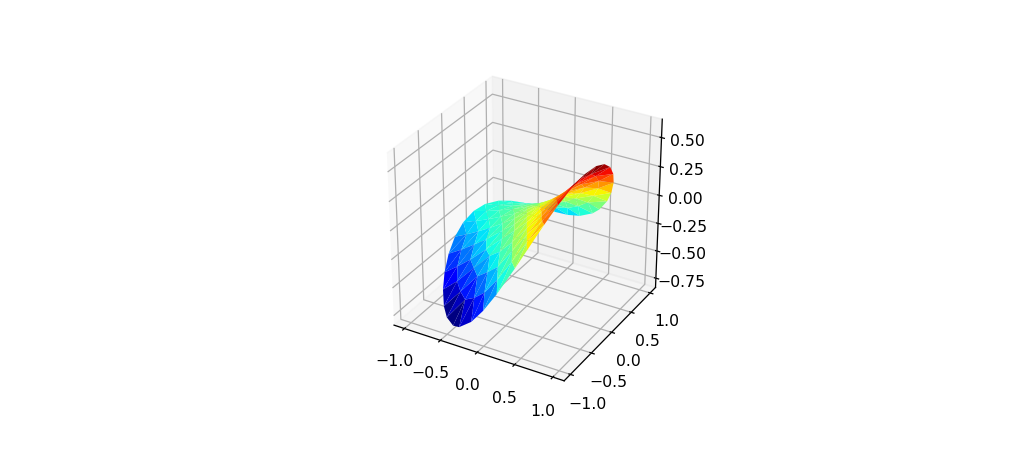

<IPython.core.display.Javascript object>


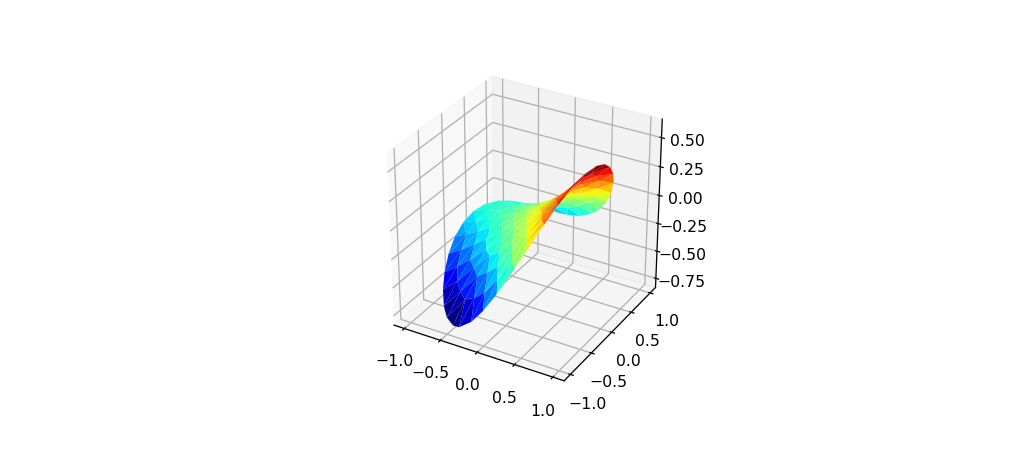

In [8]:
test_y = np.random.rand(M)*2 - 1
true = fun(test_y, fs)
approx = tensor.sample(test_y, project_result=True)
plt.figure(figsize=(9, 4))
im = plot(true, mode="warp")
plt.show()
plt.figure(figsize=(9, 4))
im = plot(approx, mode="warp")
plt.show()